<a href="https://colab.research.google.com/github/vlopesliliane/imersao-dados-desafio-final/blob/main/imersao_dados_desafio_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema: Drug Discovery 

#Introdução

###Importação dos recursos necessários

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

#imporata o modelo de regressão logística
from sklearn.linear_model import LogisticRegression
#importa função de teste
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier


#Conhecimento do Conjunto de Dados

###Ler base de dados

In [2]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')

dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Criação do *DataFrame* de Teste

In [8]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['n_moa'] != 0
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
dados_combinados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,3.0,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0.0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,7.0,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0.0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,3.0,True


###Compreender as variáveis do problema

A base de dados consiste nos registros de pesquisa científica com vários compostos aplicados em culturas de células que foram submetidas a um tipo de tratamento com drogas específicas. No total, foram investigadas **3289 tipos de drogas**, não sendo possível a identificação nominal de cada um delas, uma vez que o dados foram **anonimizados** para evitar vieses de confirmação capazes de direcionar a análise de resultados da pesquisa.

O DataFrame é composto por **23814 registros/linhas** e **877 colunas.** Cada registro representa um experimento e as colunas definem os atributos de cada um desses experimentos: Id, que representa a identificação única de cada experimento, classe de tratamento, tempo de exposição e tipos de genes.

Já sabemos que o atributo "tratamento" possui duas classes distinhas, sendo elas **"com controle" e "com drogas"**. O atributo tempo possui 3 valores distintos **(24, 48, 72)** e o atributo "dose", 2 tipos distintos **(D1 e D2).**

Descobrimos que os dados referentes a série "tratamento" encontram-se desbalanceados uma vez que foram realizados muito mais experimentos **"com_droga" (21948)** em comparação com os experimentos com** "com_controle" (1866).** No entano, observa-se que o tempo médio de exposição para ambos é 48h.

In [ ]:
#@title Estrutura do conjuntos de dados 
print ("Dados: ",  dados.shape, "\n", "Dado Resultados: ", dados_resultados.shape, "\n","Dados Compinados: ", dados_combinados.shape)

Dados:  (23814, 877) 
 Dado Resultados:  (23814, 209) 
 Dados Compinados:  (23814, 879)


In [ ]:
#@title Nome da Colunas 
ColumnsName = list(dados_combinados.columns)
str(ColumnsName)

"['id', 'tratamento', 'tempo', 'dose', 'droga', 'g-0', 'g-1', 'g-2', 'g-3', 'g-4', 'g-5', 'g-6', 'g-7', 'g-8', 'g-9', 'g-10', 'g-11', 'g-12', 'g-13', 'g-14', 'g-15', 'g-16', 'g-17', 'g-18', 'g-19', 'g-20', 'g-21', 'g-22', 'g-23', 'g-24', 'g-25', 'g-26', 'g-27', 'g-28', 'g-29', 'g-30', 'g-31', 'g-32', 'g-33', 'g-34', 'g-35', 'g-36', 'g-37', 'g-38', 'g-39', 'g-40', 'g-41', 'g-42', 'g-43', 'g-44', 'g-45', 'g-46', 'g-47', 'g-48', 'g-49', 'g-50', 'g-51', 'g-52', 'g-53', 'g-54', 'g-55', 'g-56', 'g-57', 'g-58', 'g-59', 'g-60', 'g-61', 'g-62', 'g-63', 'g-64', 'g-65', 'g-66', 'g-67', 'g-68', 'g-69', 'g-70', 'g-71', 'g-72', 'g-73', 'g-74', 'g-75', 'g-76', 'g-77', 'g-78', 'g-79', 'g-80', 'g-81', 'g-82', 'g-83', 'g-84', 'g-85', 'g-86', 'g-87', 'g-88', 'g-89', 'g-90', 'g-91', 'g-92', 'g-93', 'g-94', 'g-95', 'g-96', 'g-97', 'g-98', 'g-99', 'g-100', 'g-101', 'g-102', 'g-103', 'g-104', 'g-105', 'g-106', 'g-107', 'g-108', 'g-109', 'g-110', 'g-111', 'g-112', 'g-113', 'g-114', 'g-115', 'g-116', 'g-117', 

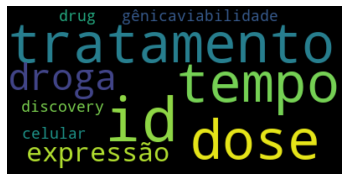

In [ ]:
#@title    
from wordcloud import WordCloud
Lista = ("id  'tratamento tempo 'dose droga expressão gênicaviabilidade celular drug discovery")

# Criando a lista de palavras
wordcloud = WordCloud(width=400, height=200, margin=0).generate(Lista)

# Mostrando no Display
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=1, y=2)
plt.show()

In [ ]:
#@title Tipos de dados
dados_combinados.dtypes

id             object
tratamento     object
tempo           int64
dose           object
droga          object
               ...   
c-97          float64
c-98          float64
c-99          float64
n_moa           int64
ativo_moa        bool
Length: 879, dtype: object

###Verificar balanceamento dos dados

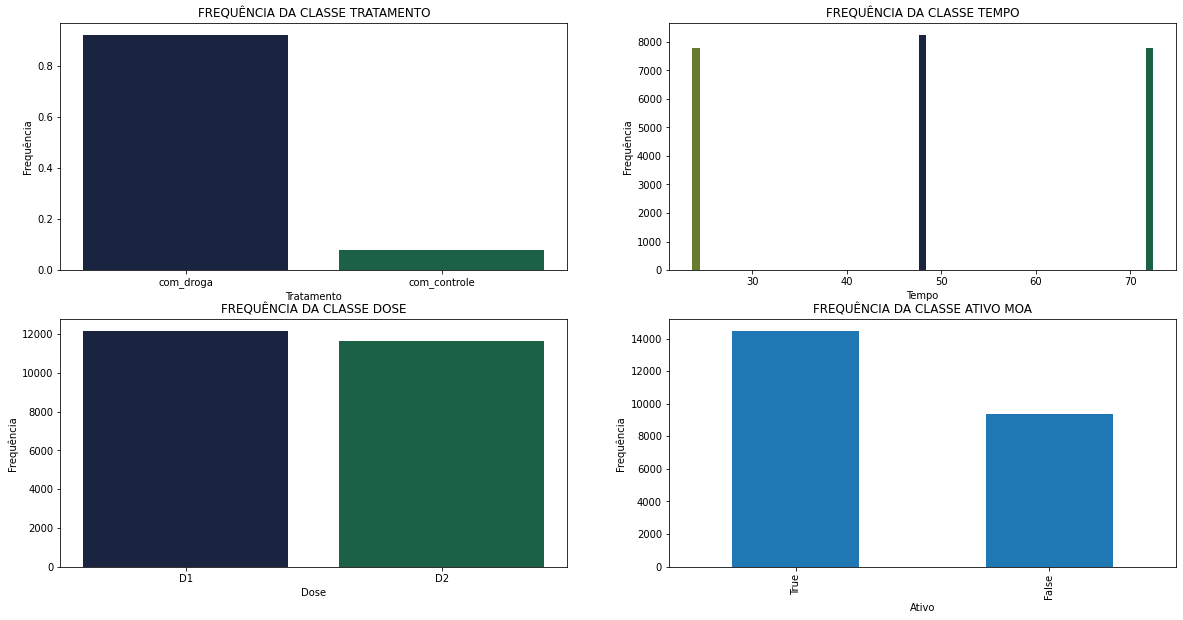

In [4]:
#@title Dashboard de frequência das principais vaiáveis do conjunto de dados 
#@markdown Observa-se pelo dashboard abaixo que os dados encontram-se balanceados, em sua maioria. 
#@markdown Um ponto que chama à atenção é com relação ao atributo tratamento, onde foram realizados um número expressivo de experientos com_droga a mais do que com_controle.
#@markdown Essa característica se deve ao tipo e área de negócio, que exige que esse tipo de pesquisa seja realizada com uma porcentagem de experimentos com placebo, na técnica duplo-cego.


# Gráfico função pyplot da biblioteca matplotlib
from matplotlib import pyplot as plt 
# Gráfico função gridspec da biblioteca matplotlib - para dashboard
from matplotlib import gridspec 

#Calcula a frequencia e reverte o index. 
frequenciaTratamento = dados['tratamento'].value_counts(normalize = True).reset_index()
frequenciaTempo = dados['tempo'].value_counts().reset_index()
frequenciaDose = dados['dose'].value_counts().reset_index()
#frequenciaAtivoMoa = dados_combinados['ativo_moa'].value_counts().reset_index()

fig = plt.figure(figsize=(20,10))

# Função para criar um dashboard
specs = gridspec.GridSpec(ncols = 2, nrows = 2, figure= fig)

ax1 = fig.add_subplot(specs[0, 0 ]) 
ax2 = fig.add_subplot(specs[0, 1 ]) 
ax3 = fig.add_subplot(specs[1, 0 ]) 
ax4 = fig.add_subplot(specs[1, 1 ])

# GRÁFICO FREQUÊNCIA DA CLASSE TRATAMENTO
plt.grid()
ax1.bar(frequenciaTratamento['index'], frequenciaTratamento['tratamento'], color = sns.color_palette('cubehelix'), zorder = 2)
ax1.set_title('FREQUÊNCIA DA CLASSE TRATAMENTO')
ax1.set_xlabel('Tratamento')
ax1.set_ylabel('Frequência')

# GRÁFICO FREQUÊNCIA DA CLASSE TEMPO
plt.grid()
ax2.bar(frequenciaTempo['index'], frequenciaTempo['tempo'], color = sns.color_palette('cubehelix'), zorder = 2)
ax2.set_title('FREQUÊNCIA DA CLASSE TEMPO')
ax2.set_xlabel('Tempo')
ax2.set_ylabel('Frequência')

# GRÁFICO FREQUÊNCIA DA CLASSE TEMPO
plt.grid()
ax3.bar(frequenciaDose['index'], frequenciaDose['dose'], color = sns.color_palette('cubehelix'), zorder = 2)
ax3.set_title('FREQUÊNCIA DA CLASSE DOSE')
ax3.set_xlabel('Dose')
ax3.set_ylabel('Frequência')

# GRÁFICO FREQUÊNCIA DA CLASSE TEMPO
plt.grid()
ax4 = dados_combinados['ativo_moa'].value_counts().plot.bar()
#ax4.bar(frequenciaAtivoMoa['index'], frequenciaAtivoMoa['ativo_moa'], color = sns.color_palette('cubehelix'), zorder = 2)
ax4.set_title('FREQUÊNCIA DA CLASSE ATIVO MOA')
ax4.set_xlabel('Ativo')
ax4.set_ylabel('Frequência')

plt.show()

##Identificação do Problema de Negócio

####Sabendo-se que cada composto químico é considerado uma classe diferente, tem-se um **problema de classificação** multiclasse. 

####As perguntas a serem respondidas são: 
**1. Dado um composto e uma assinatura celular, houve algum MoA ativado?** 

**2. E como nosso modelo vai aprender a partir da nosa base de dados?**


1. Dados os experimentos, saber se qualquer mecanismo de ação foi ativado ou não ativado.
2. Dados os experimentos, saber se um determinado mecanismo de ação foi ativado, recebendo como resposta, o composto relacionado.
3. Dado um composto e uma assinatura celular, saber se houve algum MoA ativado. 



##Identificação dos Objetivos do Negócio

**1. Realizar a análise exploratória dos dados;**

**2. Desenvolver um modelo de machine learning para auxiliar na descoberta de novos medicamentos.**


##Metodologia a ser aplicada 

#### As etapas lógicas passam a ser:

**Composto -> assinatura celular -> MoA ativado?**

#Análise Exploratória 

###Realização de testes estatísticos

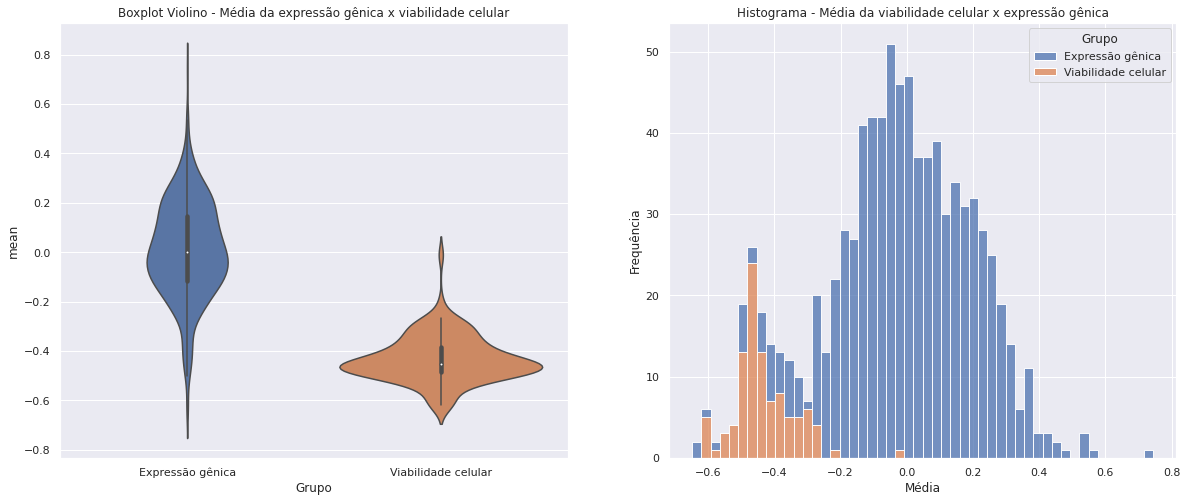

In [5]:
#@title Análise da média da expressão gênica x viabilidade celular

#Extraindo os dados 
a = pd.DataFrame({ 'Grupo' : np.repeat('Expressão gênica',772), 'mean': dados.loc[:,'g-0':'g-771'].describe().T['mean']})
b = pd.DataFrame({ 'Grupo' : np.repeat('Viabilidade celular',100), 'mean': dados.loc[:,'c-0':'c-99'].describe().T['mean'] })
df = a.append(b)

# setando o tamanho do gráfico
fig = plt.figure(figsize=(20,8)) 
sns.set() #corrigir erro gráfico colab

#Definindo os parametros do terceiro gráfico 
ax1 = fig.add_subplot(1, 2, 1)  # Adiciona a 1 linha, coluna 1
ax1.set_title("Boxplot Violino - Média da expressão gênica x viabilidade celular")
ax1.set_xlabel("Grupo")
ax1.set_ylabel("Média")
sns.violinplot(x='Grupo', y='mean', data=df)

#Definindo os parametros do quarto gráfico 
ax2 = fig.add_subplot(1, 2, 2)  # Adiciona a 1 linha, coluna 2
ax2.set_title("Histograma - Média da viabilidade celular x expressão gênica")
ax2.set_xlabel("Média")
ax2.set_ylabel("Frequência")
sns.histplot(data=df,bins=50, x='mean', hue='Grupo', multiple="stack")

# Comando que retira informações extras/desnecessárias do gráfico 
plt.show()

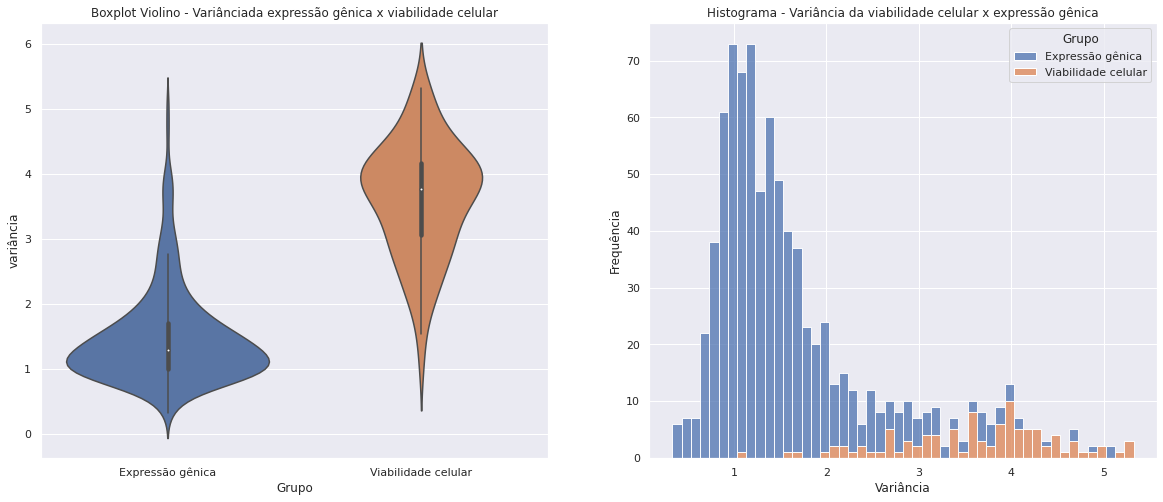

In [6]:
#@title Análise da variância da expressão gênica x viabilidade celular
#Extraindo os dados 
a = pd.DataFrame({ 'Grupo' : np.repeat('Expressão gênica',772), 'variância': dados.loc[:,'g-0':'g-771'].var()})
b = pd.DataFrame({ 'Grupo' : np.repeat('Viabilidade celular',100), 'variância': dados.loc[:,'c-0':'c-99'].var() })
df = a.append(b)

# setando o tamanho do gráfico
fig = plt.figure(figsize=(20,8)) 

#Definindo os parametros do terceiro gráfico 
ax1 = fig.add_subplot(1, 2, 1)  # Adiciona a 1 linha, coluna 1
ax1.set_title("Boxplot Violino - Variância da expressão gênica x viabilidade celular")
ax1.set_xlabel("Grupo")
ax1.set_ylabel("Variância")
sns.violinplot(x='Grupo', y='variância', data=df)

#Definindo os parametros do quarto gráfico 
ax2 = fig.add_subplot(1, 2, 2)  # Adiciona a 1 linha, coluna 2
ax2.set_title("Histograma - Variância da viabilidade celular x expressão gênica")
ax2.set_xlabel("Variância")
ax2.set_ylabel("Frequência")
sns.histplot(data=df,bins=50, x='variância', hue='Grupo', multiple="stack")

# Comando que retira informações extras/desnecessárias do gráfico 
plt.show()

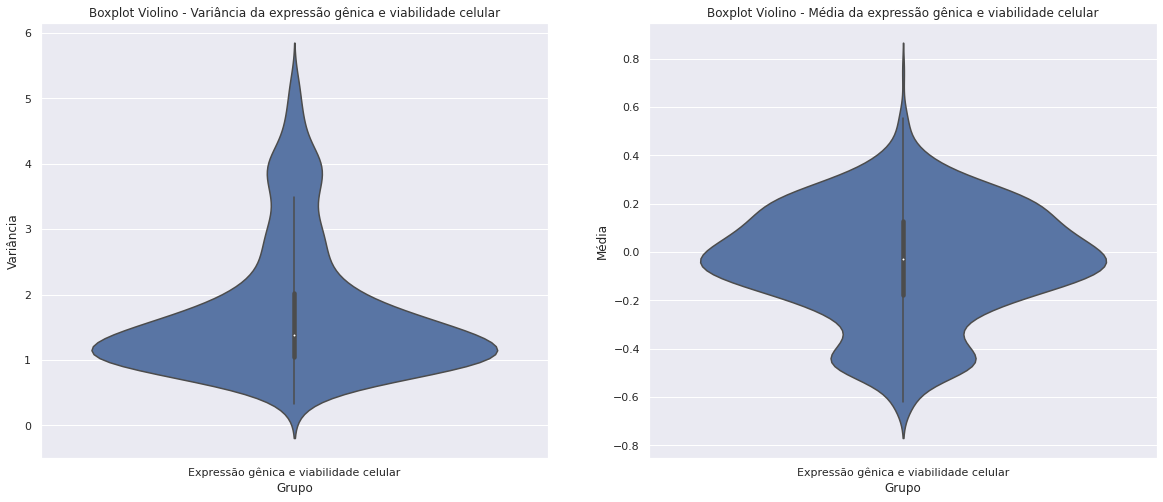

In [7]:
#@title Análise da média e variância da expressão do conjunto gênica e viabilidade celular

#Extraindo os dados 
e = pd.DataFrame({ 'Grupo' : np.repeat('Expressão gênica e viabilidade celular',872), 'Variância': dados.loc[:,'g-0':'c-99'].var()})
g = pd.DataFrame({ 'Grupo' : np.repeat('Expressão gênica e viabilidade celular',872), 'Média': dados.loc[:,'g-0':'c-99'].describe().T['mean']})

# setando o tamanho do gráfico
fig = plt.figure(figsize=(20,8)) 

#Definindo os parametros do terceiro gráfico 
ax1 = fig.add_subplot(1, 2, 1)  # Adiciona a 1 linha, coluna 1
ax1.set_title("Boxplot Violino - Variância da expressão gênica e viabilidade celular")
ax1.set_xlabel("Grupo")
ax1.set_ylabel("Variância")
sns.violinplot(x='Grupo', y='Variância', data=e)

#Definindo os parametros do quarto gráfico 
ax2 = fig.add_subplot(1, 2, 2)  # Adiciona a 1 linha, coluna 2
ax2.set_title("Boxplot Violino - Média da expressão gênica e viabilidade celular")
ax2.set_xlabel("Grupo")
ax2.set_ylabel("Frequência")
sns.violinplot(x='Grupo', y='Média', data=g)

# Comando que retira informações extras/desnecessárias do gráfico 
plt.show()

#Desenvolvimento e Apliação de modelos de *Machine Learning*

###Aplicação de algoritmos de *Machine Learning*

O algoritmo Gaussian Naive Baes é um dos principais modelos de machine learning utilizado em problemas de classificação multi-classes, ou seja, nos quais o conjunto de dados apresenta múltiplas classes e no qual busca-se a partir dessas classe acertar as variáveis-alvo para construir um modelo de predição, como no caso desse projeto em que busca-se a partir das classes expressão gênica e viabilidade celular descobrir quais efeitos foram ativados.[[Fonte: 4]](https://pubs.acs.org/doi/full/10.1021/acs.jcim.9b00136)


Os testes com esse modelo, apresentaram uma acurácia de 43% e se mostrou ineficaz com os parâmetros aplicados, uma vez que se chutassemos que todas as classes foram ativadas, acertariamos 60% das vezes. 

Observa-se ainda a ocorrência de overfitting, uma vez que as pontiações para o conjunto de treino ficaram abaixo dos valores para o conjunto de testes.

Esse resultado demonstrou a necessidade de buscar melhores parâmetros e técnicas de teste do modelo. 

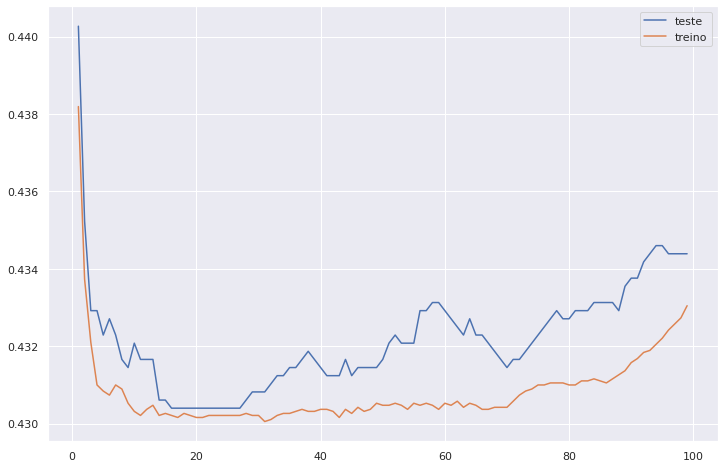

In [ ]:
#@title Resultado do teste do modelo Gaussian Naive Bayes (GaussianNB)


from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split

x = dados_combinados.select_dtypes('float64') #seleciona expressão gênica e viabilidade celular (entradas)
y = dados_combinados['ativo_moa'] # se ativou ou não (classificação)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=42)

teste=[]
treino=[]

for i in range(1,100):
  modelo_nBayes = GaussianNB (priors = None, var_smoothing = i) # instancia o modelo de regressão. 
  modelo_nBayes.fit(x_treino, y_treino) # fit treina o  modelo 
  teste.append(modelo_nBayes.score(x_teste, y_teste)) # predição do modelo
  treino.append(modelo_nBayes.score(x_treino, y_treino))

sns.set()
plt.figure(figsize=(12,8))
sns.lineplot(x=range(1,100), y = teste, label='teste')
sns.lineplot(x=range(1,100), y = treino, label='treino')
plt.show()

#### **Problema dos parâmetros de um algoritmo de Machine Learning**

Percebe-se pelos testes realizados com o modelo MLPClassifier que não é uma tarfa fácil **descobrir** quais são os **parâmetros ideais** de se aplicar nos algoritmos de machine learning. 

Dada essa dificuldade, a tendência é optar por métodos de **tentativa-erro ou força bruta, até** encontrar um valor de parametro que produza a maior pontuação ou o  ***score* perfeiro**. 

Essa, no entanto, não é uma boa prática e frequentimente leva à ocorrência de erros metodológicos no modelo, pois corre-se o risco de ao avaliar e testar diferentes parâmetros **(hiperparâmetros)**, vazar dados do conjunto de testes para o conjunto de validação, tornando o algoritmo incapaz de **generalizar** o seu aprendizado para a **predição/descoberta de novos conhecimentos.**

Esse problema é também conhecido como **overfitting.** [ [Fonte: 1 e 2] ](https://scikit-learn.org/stable/modules/cross_validation.html)



#### **Problema do particionamento do conjunto de dados**

Ao **particionar **o conjunto de dados em **subconjunto de teste e validação**, temos o problema de** reduzir **drasticamente o número de **amostras** que podem ser usadas para aprender o modelo, e os resultados podem depender de uma escolha aleatória dos valores de parâmetros para o par de (teste, treino) que produzam o melhor resultado no modelo em estudo. 

#### **Validação Cruzada com Scikit-learn**

Para evitar o **overfitting** e demais erros metodológicos na construção do modelo e ainda assim mover-se na busca pelos melhores parâmetros **(Tuning)** aplicáveis ao problema de negócio, uma boa prática é a realização da **validação cruzada ** , uma técnica que particiona o conjuento de dads em vários subconjuntos, mutualmente exclusivos. Nessa técnica, utiliza-se parte dos subconjuntos para estimar os melhores valores para os parâmetros e a outra parte dos subconjuntos para validação do aprendizado do modelo. 

Esta técnica é amplamente empregada em problemas onde o objetivo da modelagem é a descoberta de conhecimento em conjuntos de dados novos e desconhecidos com as mesmas características do modelo, como é o caso do nosso projeto de **Drug Discovery**.[[Fonte 3]](https://pt.wikipedia.org/wiki/Valida%C3%A7%C3%A3o_cruzada)

Assim, buscou-se utilizar a **validação cruzada** para comparar os **melhores modelos de Machine Learning** aplicáveis ao problema de **Drug Discovery**. 

Os modelos a serem testados foram escolhidos com base no artigo **Machine Learning Methods in Drug Discovery** [[Fonte 4]](https://pubs.acs.org/doi/full/10.1021/acs.jcim.9b00136)

Existem três tipos principais de **métodos** para realização do **particionamento do conjunto de dados** na validação cruzada, sendo eles: **o método holdout, o k-fold e o leave-one-out.** [[Fonte 3]](https://pt.wikipedia.org/wiki/Valida%C3%A7%C3%A3o_cruzada)

No modelo  de Drug Discovery em estudo foi utlilizada a **validação cruzada pelo método k-fold** que consiste em: 



> Dividir o conjunto total de dados em k subconjuntos mutuamente exclusivos do mesmo tamanho e, a partir daí, um subconjunto é utilizado para teste e os k-1 restantes são utilizados para estimação dos parâmetros, fazendo-se o cálculo da acurácia do modelo. Este processo é realizado k vezes alternando de forma circular o subconjunto de teste. Ao final das k iterações calcula-se a acurácia sobre os erros encontrados, através da equação descrita anteriormente, obtendo assim uma medida mais confiável sobre a capacidade do modelo de representar o processo gerador dos dados. [[Fonte 3]](https://pt.wikipedia.org/wiki/Valida%C3%A7%C3%A3o_cruzada)















In [9]:
#@title __

from sklearn.model_selection import cross_val_score

from sklearn.datasets import make_classification

from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [10]:
#@title Teste simultâneo de seis modelos de Machine Learning  
#Particionando o conjunto de dados 
x = dados_combinados.select_dtypes('float64') #seleciona expressão gênica e viabilidade celular (entradas) 
y = dados_combinados['ativo_moa'] # se ativou ou não (classificação)

#definindo treino 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)

# conjunto de modelos a serem testados 
models = [MLPClassifier(51), LinearRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB() ]

# cria lista de score de cada modelo
models_scores= []

COLUNAS= ['Modelo', 'Media', 'Desvio']
df = pd.DataFrame(columns=COLUNAS)

for model in models:
    val_scores = cross_val_score(model, x_treino, y_treino, cv=5)
    nome_modelo = type(model).__name__ # somente para exibição do nome do modelo no output
    print('Modelo: {} | Média: {:.2} | Desvio: {:.2} | Acurácia em cada cv: {}'.format(nome_modelo, np.mean(val_scores), np.std(val_scores),val_scores ))
    df = df.append({'Modelo': nome_modelo, 'Media': np.mean(val_scores), 'Desvio':np.std(val_scores)}, ignore_index=True)

Modelo: MLPClassifier | Média: 1.0 | Desvio: 0.00045 | Acurácia em cada cv: [0.9997376  0.9984252  0.99868766 0.9992126  0.99895013]
Modelo: LinearRegression | Média: 0.85 | Desvio: 0.0051 | Acurácia em cada cv: [0.8451259  0.85758652 0.85543083 0.85399046 0.86020156]
Modelo: SVC | Média: 0.99 | Desvio: 0.0011 | Acurácia em cada cv: [0.99160325 0.99291339 0.99160105 0.99107612 0.98950131]
Modelo: DecisionTreeClassifier | Média: 1.0 | Desvio: 0.0 | Acurácia em cada cv: [1. 1. 1. 1. 1.]
Modelo: RandomForestClassifier | Média: 1.0 | Desvio: 0.0012 | Acurácia em cada cv: [0.99816321 0.99553806 0.99553806 0.99527559 0.9976378 ]
Modelo: GaussianNB | Média: 0.97 | Desvio: 0.0024 | Acurácia em cada cv: [0.96982419 0.96902887 0.96902887 0.96771654 0.96325459]


###Comparação de algoritmos 

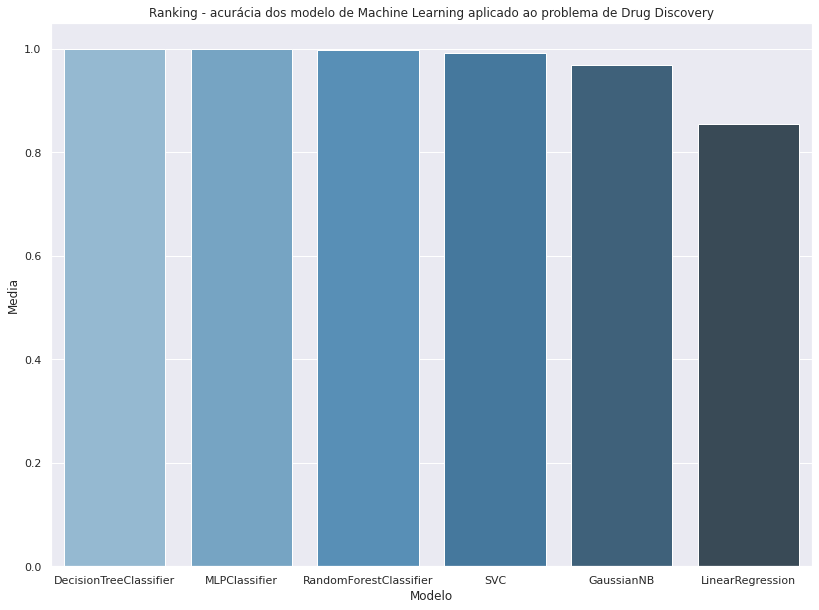

In [30]:
#@title    

#Extraindo dados 
Ranking = df.sort_values(by ='Media', ascending= False)

# setando o tamanho do gráfico
fig = plt.figure(figsize=(30,10)) 

#Definindo os parametros do terceiro gráfico 
ax1 = fig.add_subplot(1, 2, 1)  # Adiciona a 1 linha, coluna 1
ax1.set_title("Ranking - acurácia dos modelo de Machine Learning aplicado ao problema de Drug Discovery")
sns.barplot(x="Modelo", y="Media", ax= ax1, data=Ranking, palette="Blues_d")
plt.show()

####A partir da aplicação da técnica de **validação cruzada,** pode-se avaliar o desenpenho dos algoritmos antes da otimização dos parâmetros. Assim, essa técnica funciona como uma **pré-triagem** para selecionar o método que melhor se aplica ao problema. 

####A partir dos resultados podemos escolher 2 ou 3 métodos que tiveram o melhor desempenho para fazer a **tunning** dos parâmetros e encontrar os **hiperparâmetros.** 



#Considerações Finais

#### Durante a execução desse projeto, observa-se que é possível traçar um **algorítimo** para o desenvolvimento de projeto de **Machine Learning**. 

#### A primera coisa a se fazer é **conhecer o conjunto de dados:**

1.   Qual o tamanho desse banco de dados?
2.   Quais são os seus atributos?
3.   Quais são os tipos desses atributos?
4.   Qual a relação entre as variáveis?
5.   Os dados estã obalanceados?
5.   É necessário criar variáveis ou mudar a estrutura da base de dados para faciliar a análise?

####Respondidas essas perguntas, temos que fazer **testes estatísticos** buscando por erros, incoerências e para entender como esses dados estã odistrinuídos.

#### A partir das características identificadas, passamos para o levantamento do problema de negócio:

2. É um problema de regressão?
3. É um problema de classificação?
4. É um problema de clusterização?
5. Ou não é um problema de machine learning?

#### Se for um problema de machine learning, devemos** levantar os principais algoritmos** aplicados para esse tipo de problema.

#### Testá-los. 

###Otimizar os parâmetros.





###Limitações do seu projeto

O projeto não realizou a otimização dos parâmtros de teste, nem especificou o intervalo de confiança para sua utilização. 

###Ideias para projetos futuros

O próximo passo seria encontrar os hiperparâmetros utilizando a classe GridSearchCV() do sklearn, que consegue indicar os melhores valores de parâmetros para um determinado modelo a partir do conjunto de dados.

Outra etapa necessária seria estudar modelos mais aplicaveis a problemas cujo conjunto de dados apresenta alta variância, conforme [demonstrado](https://colab.research.google.com/drive/13GAOWcEivzu6w66gbxfpzSUHBXQjjfUb#scrollTo=aqzzHx4yRgda&line=1&uniqifier=1)




#Referências Bibliográficas 

1. [Validação Cruzada com Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
2. [Validação cruzada: avaliando o desempenho do estimador com Scikit-learn](https://scikit-learn.org/stable/modules/cross_validation.html)
3. [Validação cruzada](https://pt.wikipedia.org/wiki/Valida%C3%A7%C3%A3o_cruzada)
4. [Machine Learning in Drug Discovery](https://pubs.acs.org/doi/full/10.1021/acs.jcim.9b00136)
5. [sklearn.naive_bayes.GaussianNB ](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=naive#sklearn.naive_bayes.GaussianNB/)
6. [A Gentle Introduction to Bayes Theorem for Machine Learning](https://machinelearningmastery.com/bayes-theorem-for-machine-learning/)
7. [Validação Cruzada Aninhada com Scikit-learn](https://dataml.com.br/validacao-cruzada-aninhada-com-scikit-learn/)